# Feature analysis
**Purpose**: 
* analyse dataset features without inclusion of target value
  * if it looks healthy
    * duplicate values
    * NA values
    * zero/0 values
  * if the values are "too constant", ie. most [robably bad features for classifcation/regression
    * small std values
    * entropy is too high/too low(not sure right now?) - "Entropy is a measure of disorder or uncertainty"
    * number of unique values in categorical features is too high - most probably they are unable to identify any group of targets
  * drop highly correlated values 
    * to improve performance of the model training 
    * to decrease dataset size for further exploration 

## Imports

In [1]:
import os
import sys

sys.path.append(os.getcwd())
os.chdir("../..")

import pandas as pd

# import plotly.graph_objects as go
from churn_pred.eda.features.analysis import (
    missing,
    zero,
    nunique,
    init_check,
    std,
    entropy,
    nunique,
)
from churn_pred.eda.features.plotting import cross_correlation, distributions

## Dataset

In [2]:
df_pd = pd.read_csv("data/dataset.csv")
df_pd.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,I can not link my card to any third-party plat...,160980.03,1,0,0,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,"Last week, I reached out to my bank's support ...",151762.74,1,0,1,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,NaN,82767.42,1,1,0,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,NaN,128743.80,1,0,0,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,"Yo, I gotta give some love to this bank's cust...",133550.67,1,1,1,46941.41,0


In [4]:
target_col = "Exited"
id_col = "CustomerId"
cat_cols = "Surname", "Country", "Gender", "CustomerFeedback"
cont_cols = df_pd.drop(columns=id_col + cat_cols + target_col).columns.values.tolist()

,user_id,count_errorfound_time_stamp,count_applaunched_time_stamp,count_applaunched_install_time,count_depositclicked_time_stamp,count_depositdialogviewed_time_stamp,count_depositinitiated_time_stamp,count_depositoffersshowed_time_stamp,count_depositpackclicked_time_stamp,count_depositvaluechanged_time_stamp,...,avg_urostercancelled_rake_amount,min_urostercancelled_rake_amount,max_urostercancelled_rake_amount,avg_memoryinfoongamelaunch_native_memory_now_in_mb,min_memoryinfoongamelaunch_native_memory_now_in_mb,max_memoryinfoongamelaunch_native_memory_now_in_mb,count_topupdialogviewed_app_version,count_g_bench_low_fps_time_stamp,target_ltv,target
0,005vT7y75hVO1fZMsSR6W1h9l583,56,11,0,5,2,3,13,3,19,...,NaN,NaN,NaN,41.804474,41.804474,41.804474,16,9,1.257455,1.257455
1,00EbaSg3fTO7Sev8pYoWAJq9Hc43,50,5,0,1,<NA>,1,7,<NA>,7,...,NaN,NaN,NaN,NaN,NaN,NaN,5,<NA>,6.185779,6.185779
2,00FQoVOsL7Qke16BNqqsHoyt7Ul1,26,1,0,1,<NA>,1,4,<NA>,1,...,NaN,NaN,NaN,312.256586,51.415237,829.290985,1,<NA>,5.475000,5.475000
3,00HAhMxOURSSwmEVhSfQDKwRxKz1,250,61,0,2,3,<NA>,1,<NA>,7,...,NaN,NaN,NaN,59.936310,59.936310,59.936310,22,11,0.309360,0.309360
4,00JEpTvvm4RXvv8wkihCTVAngAH3,12,1,0,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,NaN,NaN,NaN,64.058823,64.058823,64.058823,2,<NA>,0.087146,0.087146


## Features

### Analysis

In [6]:
duplicated_ids, cont_cols_desc, cat_cols_desc = init_check(
    df=df_pd,
    identifier=id_cols,
    cat_cols=cat_cols,
    cont_cols=cont_cols,
    verbose=True,
)

# duplicated_ids, cont_cols_desc.head(), cat_cols_desc.head()

[CHECK] Number of duplicated ids: 0
[CHECK] Numerical columns
                                                     count    mean      std  \
count_urewardstatechange_cash_value                 5572.0    4.33     4.34   
min_utournamentreportcard_used_amount              44296.0    1.82    31.35   
max_utournamentreportcard_sit_in_amount            44296.0   31.14   326.33   
count_uugcinvitationstatus_tournament_id           18262.0    9.78    17.41   
min_udepositstatus_deposit_amount_status_Complete   7639.0  118.13   676.03   
...                                                    ...     ...      ...   
max_uroomreportcard_rake_amount                    43996.0    1.05    11.74   
min_utournamentreportcard_amount_refunded_bonus    44296.0     0.0     0.08   
count_g_bench_low_fps_time_stamp                   19353.0   34.08   232.61   
sum_udepositstatus_deposit_amount_status_Complete   7639.0  397.61  2944.54   
count_depositpackclicked_time_stamp                 4667.0    5.27   

min_udepositstatus_deposit_amount_status_Processing      1.0
max_udepositstatus_deposit_amount_status_Processing      1.0
count_roomconcludedv2_rake_amount                        1.0
count_udepositstatus_deposit_amount_status_Processing    1.0
avg_roomconcludedv2_rake_amount                          1.0
dtype: float64

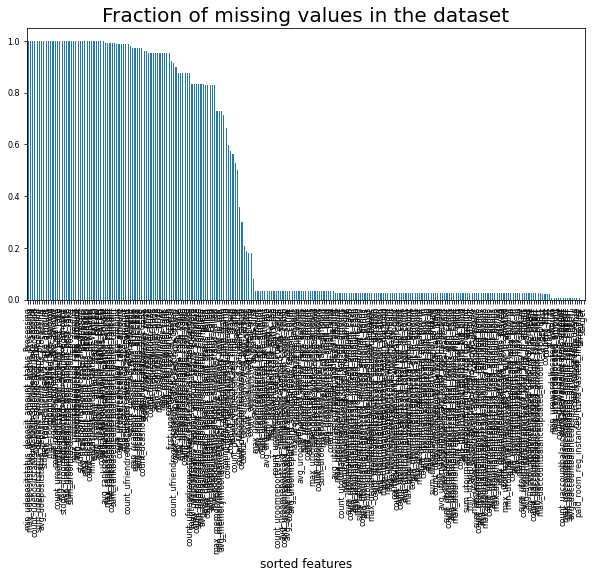

In [7]:
missing_val_frac, fig = missing(
    df=df_pd.drop(columns=id_col),
    scale="linear",
    plot=True,
)

missing_val_frac.head()

paid_room_reg_instances_trivia_fastest_fingers_first    0.994488
min_utournamentreportcard_amount_refunded_bonus         0.972505
min_utournamentreportcard_used_amount_bonus             0.972483
min_utournamentreportcard_unused_amount_bonus           0.972461
avg_utournamentreportcard_amount_refunded_bonus         0.972022
dtype: float64

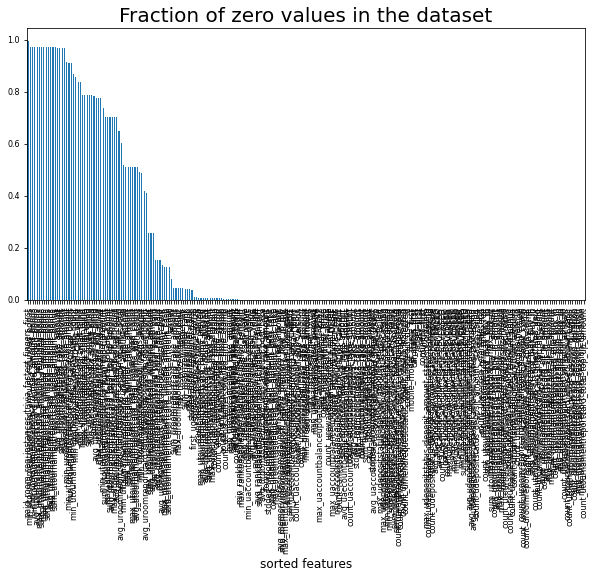

In [8]:
zero_val_frac, fig = zero(
    df=df_pd.drop(columns=id_col),
    scale="linear",
    plot=True,
)

zero_val_frac.head()

min_roomconcludedv2_rake_amount                          0
avg_roomconcludedv2_rake_amount                          0
avg_udepositstatus_deposit_amount_status_Processing      0
stddev_roomconcludedv2_rake_amount                       0
count_udepositstatus_deposit_amount_status_Processing    0
dtype: int64

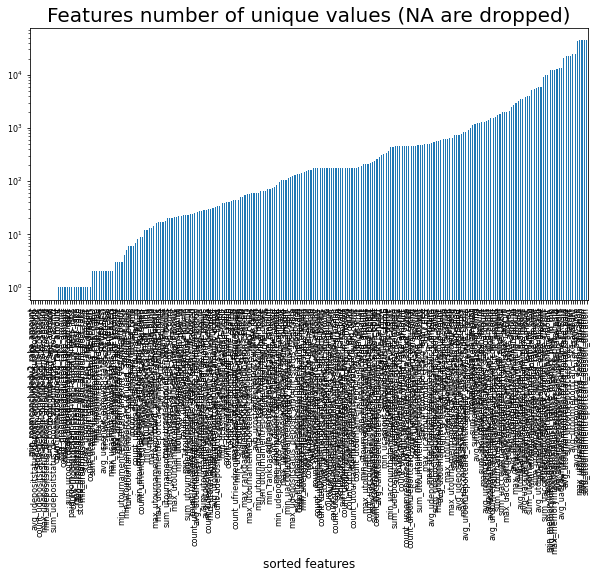

In [9]:
data_nunique, fig = nunique(
    df=df_pd.drop(columns=id_col),
    scale="log",
    plot=True,
)

data_nunique.head()

sum_udepositstatus_deposit_amount_status_Failed    328452.698405
max_udepositstatus_deposit_amount_status_Failed    171245.001731
avg_udepositstatus_deposit_amount_status_Failed    122437.368043
min_udepositstatus_deposit_amount_status_Failed    114839.775516
sum_utournamentreportcard_max_buy_in                19467.912736
dtype: object

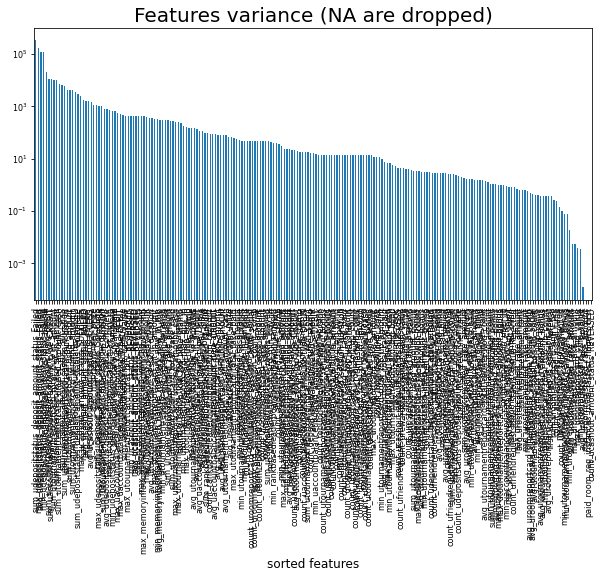

In [10]:
data_std, fig = std(
    df=df_pd[cont_cols],
    scale="log",
    plot=True,
)

data_std.head()

sum_utournamentreportcard_session_duration    10.532264
avg_utournamentreportcard_session_duration    10.532233
min_utournamentreportcard_session_duration    10.531898
max_utournamentreportcard_session_duration    10.531320
avg_uroomreportcard_actual_play_time          10.473922
dtype: float64

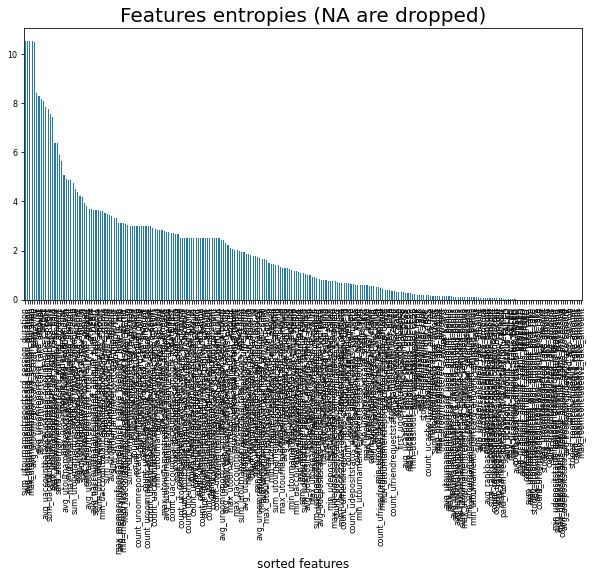

In [11]:
col_entropies, fig = entropy(
    df=df_pd.drop(columns=id_col),
    scale="linear",
    plot=True,
)

col_entropies.head()

### Plotting

Top 10 absolute correlations
avg_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count         1.0
min_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count         1.0
sum_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count         1.0
                                     avg_uroomreportcard_simultaneous_session_count_comp    1.0
max_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count         1.0
min_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count_comp    1.0
max_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count_comp    1.0
avg_ucashout_amount_status_REVERSED  avg_uroomreportcard_simultaneous_session_count_comp    1.0
sum_ucashout_amount_status_REVERSED  avg_memoryinfoongamelaunch_native_memory_now_in_mb     1.0
min_ucashout_amount_status_REVERSED  avg_memoryinfoongamelaunch_native_memory_now_in_mb     1.0
dtype: floa

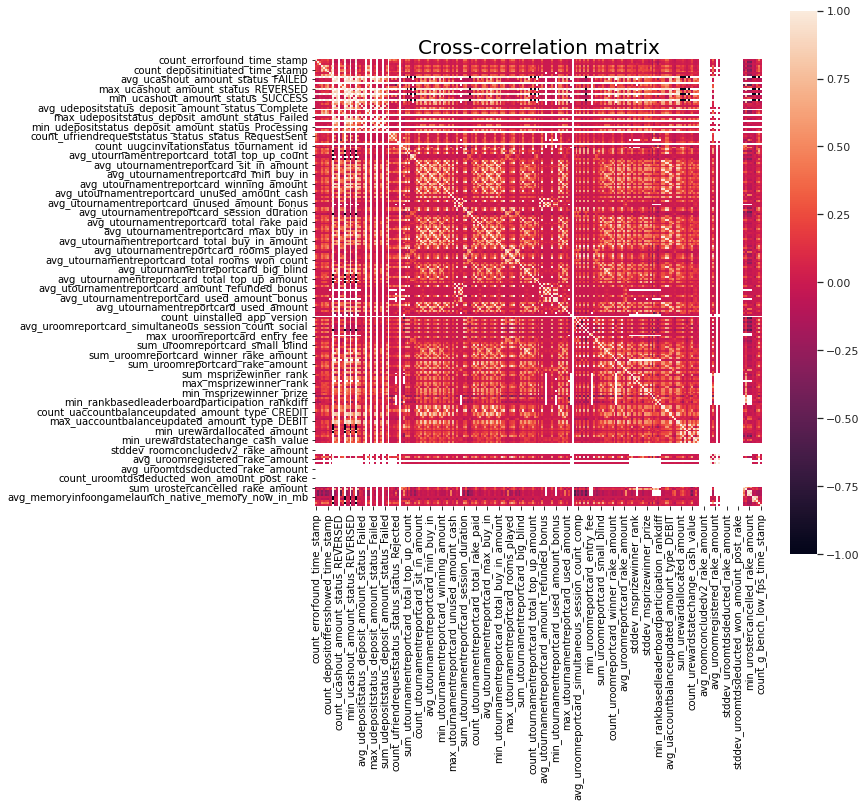

In [6]:
fig = cross_correlation(df=df_pd[cont_cols], n=10, verbose=True)

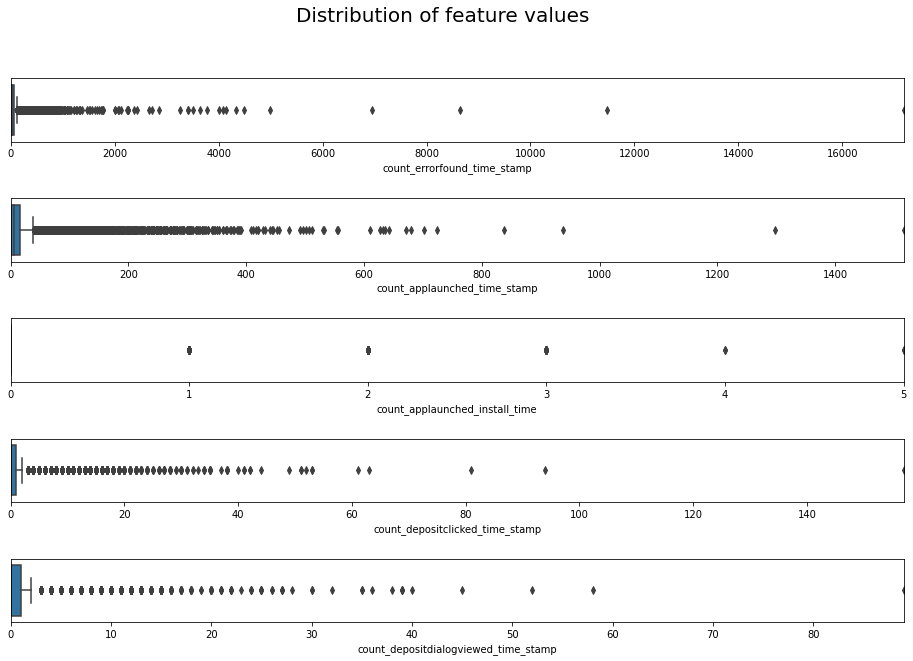

In [9]:
fig = distributions(
    df=df_pd[cont_cols],
    low_per_cut=0,
    high_per_cut=1,
    type="box",
)